In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
data_path = '/content/drive/MyDrive/FinalProject_CS231/data'

danger_path = os.path.join(data_path, 'danger')
instruction_path = os.path.join(data_path, 'instruction')
prohibition_path = os.path.join(data_path, 'prohibition')
neg_path = os.path.join(data_path, 'neg')

In [4]:
danger_images = [os.path.join(danger_path, img_path) for img_path in os.listdir(danger_path)]
instruction_images = [os.path.join(instruction_path, img_path) for img_path in os.listdir(instruction_path)]
prohibition_images = [os.path.join(prohibition_path, img_path) for img_path in os.listdir(prohibition_path)]
neg_images = [os.path.join(neg_path, img_path) for img_path in os.listdir(neg_path)]

In [ ]:
def img_show(img_list):
  fig, ax = plt.subplots(3, 3, figsize = (5, 5))
  for i in range(3):
    for j in range(3):

      ax[i, j].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

      img = cv2.imread(img_list[5 * i + j])
      ax[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

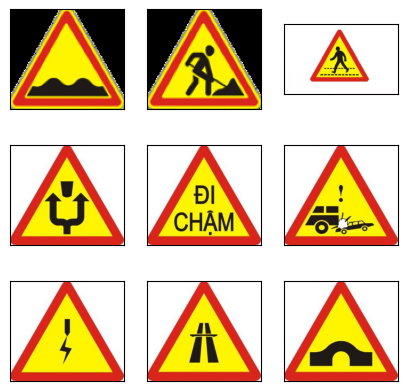

In [ ]:
img_show(danger_images[10:])

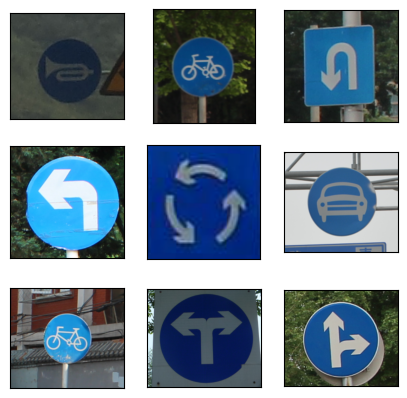

In [ ]:
img_show(instruction_images)

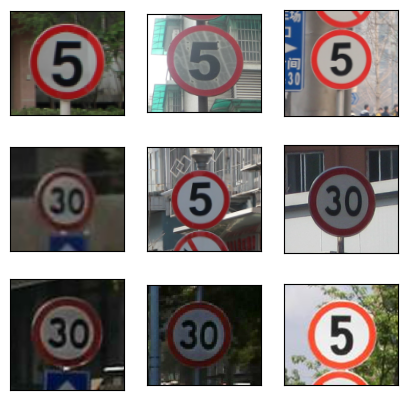

In [ ]:
img_show(prohibition_images)

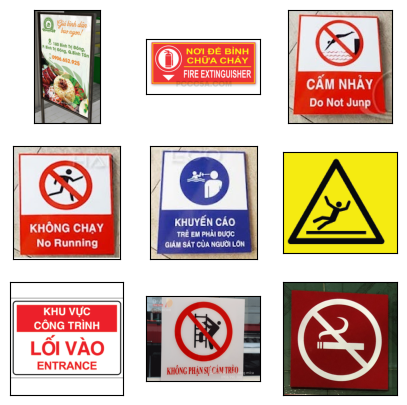

In [ ]:
img_show(neg_images[100:])

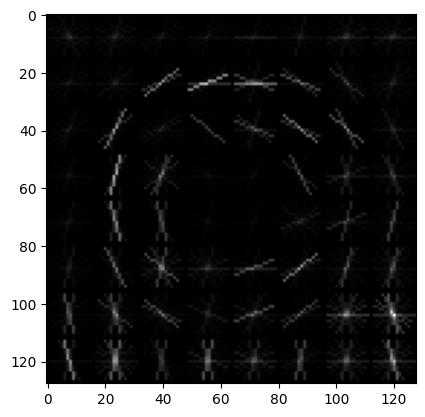

In [ ]:
img = cv2.imread(instruction_images[8])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (128, 128))
hg, hg_image = hog(img, orientations=9,
                     pixels_per_cell=(16, 16), cells_per_block=(2, 2),
                     block_norm='L2-Hys', visualize=True, transform_sqrt=True)
plt.imshow(hg_image, cmap='gray')

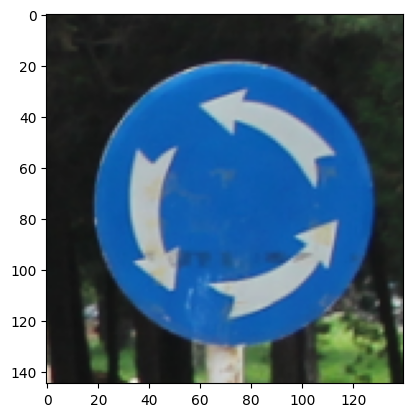

In [ ]:
img = cv2.cvtColor(cv2.imread(instruction_images[8]), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
# Make HOG features for training and label data
def label_data(paths, images, labels, type):
    for path in paths:
      image = cv2.imread(path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # Check number of color channels
      if image.ndim == 3:  # RGB image
          image = cv2.cvtColor(cv2.resize(image, (128, 128)), cv2.COLOR_RGB2GRAY)
      elif image.ndim == 2:  # Grayscale image
          image = cv2.resize(image, (128, 128))
      else:
          # Handle unsupported image format
          print("Unsupported image format:", danger_path)
          continue

      hog_feature, _ = hog(image, orientations=9,
                            pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                            block_norm='L2-Hys', visualize=True, transform_sqrt=True)

      images.append(hog_feature)
      labels.append(type)

In [17]:
images = []
labels = []

paths = [neg_images, danger_images,  prohibition_images, instruction_images]

for type, path in enumerate(paths):
    label_data(path, images, labels, type)

In [18]:
X = np.array(images)
y = np.array(labels)

print(X.shape)
print(y.shape)

(600, 8100)
(600,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : list(range(1, 10)),
          'min_samples_split' : list(range(2, 6)),
          'min_impurity_decrease' : list(np.arange(0, 0.5, 0.05))
          }
tree_model = DecisionTreeClassifier(random_state=0)
classifier = GridSearchCV(tree_model, params, cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.05, 0.1,
                                                   0.15000000000000002, 0.2,
                                                   0.25, 0.30000000000000004,
                                                   0.35000000000000003, 0.4,
                                                   0.45],
                         'min_samples_split': [2, 3, 4, 5]})

In [ ]:
print(classifier.best_params_)
print(classifier.best_score_)

{'criterion': 'gini', 'max_depth': 6, 'min_impurity_decrease': 0.0, 'min_samples_split': 2}
0.7506837786661056


In [20]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8 ,min_samples_split=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       random_state=0)

In [21]:
accuracy_score(y_train, tree.predict(X_train))

1.0

In [22]:
accuracy_score(y_test, tree.predict(X_test))

0.7

[Text(0.5831766917293233, 0.9375, 'x[363] <= 0.199\nentropy = 1.998\nsamples = 489\nvalue = [133, 118, 117, 121]'),
 Text(0.37030075187969924, 0.8125, 'x[916] <= 0.251\nentropy = 1.651\nsamples = 291\nvalue = [127, 41, 13, 110]'),
 Text(0.18045112781954886, 0.6875, 'x[364] <= 0.125\nentropy = 1.537\nsamples = 176\nvalue = [28, 38, 7, 103]'),
 Text(0.09774436090225563, 0.5625, 'x[418] <= 0.315\nentropy = 1.484\nsamples = 51\nvalue = [24, 18, 0, 9]'),
 Text(0.06015037593984962, 0.4375, 'x[386] <= 0.185\nentropy = 1.104\nsamples = 33\nvalue = [23, 2, 0, 8]'),
 Text(0.03007518796992481, 0.3125, 'x[1068] <= 0.283\nentropy = 0.454\nsamples = 21\nvalue = [19, 2, 0, 0]'),
 Text(0.015037593984962405, 0.1875, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0]'),
 Text(0.045112781954887216, 0.1875, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(0.09022556390977443, 0.3125, 'x[1169] <= 0.232\nentropy = 0.918\nsamples = 12\nvalue = [4, 0, 0, 8]'),
 Text(0.07518796992481203, 0.1875, 'en

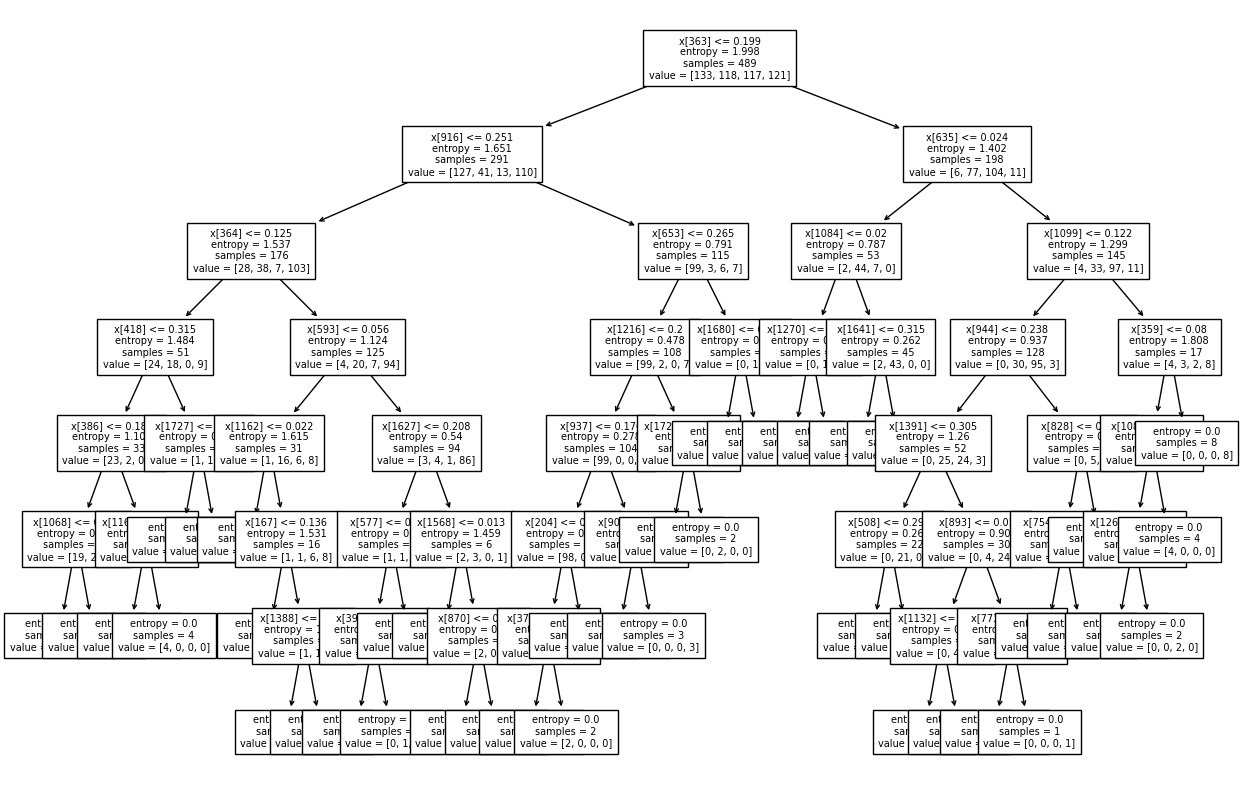

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(tree, fontsize=7)
plt.show

In [23]:
from sklearn.metrics import classification_report

# In ra báo cáo phân loại
report = classification_report(y_test, tree.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        28
           1       0.91      0.71      0.80        28
           2       0.86      0.69      0.77        36
           3       0.59      0.79      0.68        28

    accuracy                           0.70       120
   macro avg       0.72      0.70      0.70       120
weighted avg       0.73      0.70      0.71       120



In [24]:
import pickle

In [26]:
model_filename = 'decision_tree_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(tree, file)